<h1 style="color:rgb(0,120,170)">Introduction to Machine Learning -- $k$-nearest neighbor</h1>
<h2 style="color:rgb(0,120,170)">OEAW Machine Learning Summer School 2019</h2>

<h3 style="color:rgb(0,120,170)"> Task 1.1 </h3>

Visualize the data from 'DataSet1.csv'.
Why is $k$-nearest neighbor possibly a reasonable approach?

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 1.1:</h3>

In [19]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'x2')

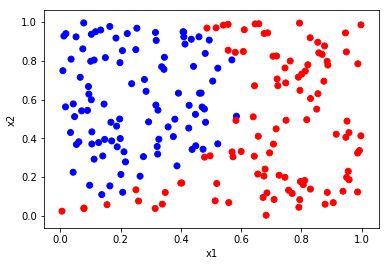

In [20]:
#Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

#Plot distribution
color= ['red' if elem > 0 else 'blue' for elem in y ]
plt.scatter(X[:,0], X[:,1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')

The data is cleanly separated. Thus, a clear separation -- even at the border region -- is expected.

<h3 style="color:rgb(0,120,170)"> Task 1.2 </h3>

Training the model

Use k-nearest neighbor classifiers with $k \in \{1,3,5,...,47,49,51\}$. Either use the `kNeigbhors` function from
`sklearn` or implement it on your own. In order to estimate the generalization error, use 10-fold
cross validation. Visualize your results (plot $k$ vs. error rates).

Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ gives complex models? Why?<br>
How does the error develop with the model complexity? Why?

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 1.2:</h3>

In [21]:
#Evaluation of kNN method
from sklearn.model_selection import KFold
from sklearn import neighbors

def evaluate_kNN(X,y,kfold,n_neighbors): 
    error = []
    for train, test in KFold(kfold).split(X,y):
        classifier = neighbors.KNeighborsClassifier(n_neighbors)
        classifier.fit(X[train],y[train])
        y_pred = classifier.predict(X[test])
        error.append(np.mean(y_pred != y[test]))
    return np.mean(error)  

Text(0,0.5,'Mean Error')

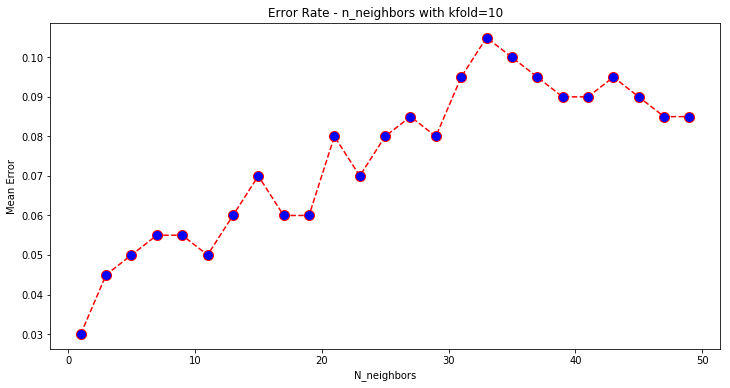

In [22]:
#kNN as function of neighbors
error_n = []
for n_neighbors in range(1,51,2):
    error_n.append(evaluate_kNN(X,y,10,n_neighbors))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1,51,2), error_n, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate - n_neighbors with kfold=10')  
plt.xlabel('N_neighbors')  
plt.ylabel('Mean Error')

The model complexity is inverse to k. Smaller k gives higher complexity as every single point is considered as distinctive feature. The error increases proportional to k. This is due to the fact that there is hardly any noise in the data. 

<h3 style="color:rgb(0,120,170)"> Task 1.3 </h3>

Label noise

Flip the sign of the labels of the data randomly with probability of $\frac{1}{5}$. Perform the same steps as before.<br>
Which differences do you observe? <br>Which conclusions do you draw from that?

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 1.3:</h3>

Text(0,0.5,'x2')

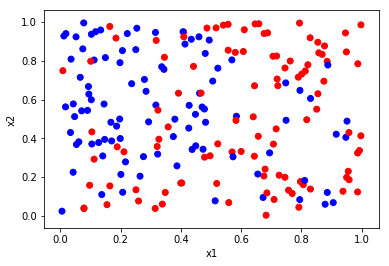

In [23]:
#Flip the labels of data
np.random.seed()
random_matrix = np.random.rand(y.shape[0])
y_new = np.where(random_matrix<0.2, -1, 1)*y
color= ['red' if d > 0 else 'blue' for d in y_new]
plt.scatter(X[:,0], X[:,1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')

The clear separation has vanished. Still a border zone is present.<br> The flipping of the labels can be interpreted as bringing noise into a clearly separable data set.

Text(0,0.5,'Mean Error')

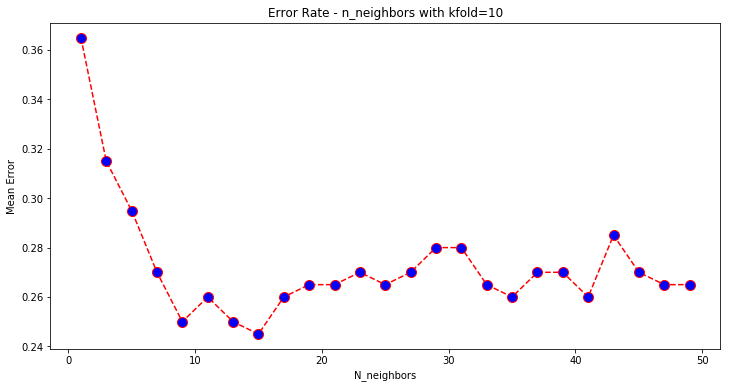

In [24]:
#kNN as function of neighbors
error_n = []
for n_neighbors in range(1,51,2):
    error_n.append(evaluate_kNN(X,y_new,10,n_neighbors))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1,51,2), error_n, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate - n_neighbors with kfold=10')  
plt.xlabel('N_neighbors')  
plt.ylabel('Mean Error')

Since the data is not clearly separable any more, very low k values correspond to a too high model complexity (overfitting). Higher k values affect regions instead of single points which seems to describe the data more correctly.